In [220]:
import numpy as np

"""
Plots of airmass functions
give zenith angles in degrees
"""
R=6378160. # radius of earth in m
h= 8000.  #scale height of atmsophere in m
air=1.00031 #refractive index of air


    

In [221]:
def simple(za):
    # plane parallel atmosphere on flat earth
    zenr=np.radians(za)
    return 1./cos(zenr)

In [222]:
def spher(za):
    #spherical earth but uniform atmosphere
    z=np.radians(za)
    cosz=np.cos(z)
    r=R/h # to scale this all
    am=np.sqrt((r*cosz)**2 +2*r +1) -r*cosz
    return am

In [223]:
"""
According to WSRT the refractive index for radio is about 1.00031
refraction = airmass*(1-refractive index)

There is something wrong in this formula
"""
def Fz(za):
    z=np.radians(za)
    #d83=1.4486232
    d83=1.45263 # where the crossover is
    #f0=0*z[z<d83]
    #f1=2.454 - 20.794*np.cos(z[z>=d83]) # 83deg   
    f0=0*z[z<d83]
    f1=2.454 - 20.794*np.cos(z[z>=d83])
    #f2=0.175 +23.5*cos(z[z>1.50009]) # 86 deg
    fa=np.append(f0,f1)
    print fa
    return fa

def WSRT(za):
    z=np.radians(za)
    cosz=np.cos(z)
    Rz=R*cosz
    airmass= 1/cosz - Fz(za)*( (Rz)**2 + 2*h/R - np.sqrt((Rz)**2 + 2*h/R)/h  - Rz/h)
    return airmass

In [224]:
"""
Kasten and Young formula
F. Kasten and A. T. Young, `Revised optical air mass tables and approximation formula',
Applied Optics 28(22), 4735{4738 (1989).

96.07995 degrees =  1.6769114726515257 radians
"""
def ky(za):
    z=np.radians(za)
    den=np.cos(z) + 0.50572*( 96.07995 - za)**(-1.6364)
    am=1.0/den
    return am

In [225]:
print ky(90.0)

37.9196083778


In [226]:
"""
Bemporad formula
"""
def bemporad(za):
    z=np.radians(za)
    sec=1.0/cos(z) # secant
    am= -0.0045 +1.00672*sec -0.002234*sec**2 - 0.0006247*sec**3
    return am
    

In [227]:
"""
Formula from Young 
A. T. Young, `Air mass and refraction', Applied Optics 33(6), 1108{1110 (1994).
using True zenith angle (NOT apparent)
"""
def young(za):
    z=np.radians(za)
    cosz=np.cos(z)
    am=(1.003198*cosz + 0.101632)/( cosz**2  + 0.090560*cosz + 0.003198)
    return am

In [228]:
"""
Ron Maddelena formula for GBT
http://www.gb.nrao.edu/~rmaddale/GBT/Calibration_Nov2012a.pdf
"""
def GBT(za):
    elev=90.-za # all in degrees
    am=-0.0234 +1.014/(np.sin(np.radians(elev+(5.18/(elev+3.35)))))
    return am
print GBT(89)

26.5020509264


In [229]:
def saao(za):
    """
    Krisciunas & Schaefer formula from 
    http://arxiv.org/pdf/1409.2996.pdf
    """
    zeta=np.radians(za)
    am=1./np.sqrt(1 - 0.96*np.sin(zeta)**2)
    return am

In [230]:
def vr(za):
    """
    Van rhijn formula
    """
    zeta=np.radians(za)
    am=1- ((R*np.sin(zeta))/(R+h))**2
    am=1/np.sqrt(am)
    return am

In [231]:
def paranal(za):
    """
    Rozenberg formula
    from http://www.aanda.org/articles/aa/pdf/2012/07/aa19040-12.pdf
    """
    ze=np.radians(za)
    c=np.cos(ze)
    am=1/(c + 0.025*np.exp( -11*c))
    return am

Populating the interactive namespace from numpy and matplotlib


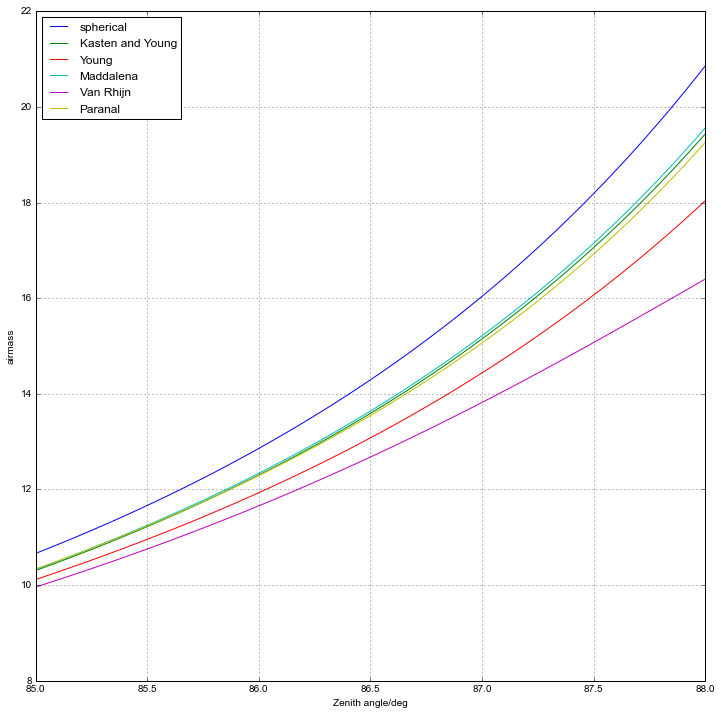

In [232]:
%pylab inline
za=np.linspace(85,88,100)
pylab.figure(1,figsize(12,12))
pylab.xlabel('Zenith angle/deg')
pylab.ylabel('airmass')
#pylab.plot(za,simple(za),label='simplistic')
pylab.plot(za,spher(za),label='spherical')
#pylab.plot(za, WSRT(za),label="WSRT")
pylab.plot(za,ky(za),label='Kasten and Young')
pylab.plot(za,young(za),label='Young')
#pylab.plot(za,bemporad(za),label='Bemporad and Schoenberg')
pylab.plot(za,GBT(za),label='Maddalena')
pylab.plot(za, vr(za),label='Van Rhijn ')
pylab.plot(za,paranal(za), label='Paranal')
pylab.legend(loc='upper left')
pylab.grid()
pylab.show()



$\Delta E = C(n_0-1)f(E_{obs})  $

$\Delta E = C(n_0-1) g (E_{true})$

approimate values:
$n_0 -1 = 3 \times 10^{-4}$

In [233]:
"""


"""

'\n\n\n'